## Baseball Pitch Identification

With the major league baseball season beginning this week, I wanted to look at pitch identification.  While watching a game, I often see pitches identified immediately as being either a fastball, curveball, slider, etc. (the various pitch types we may see in a game).  MLB uses a system called statcast to identify these pitches and, to my untrained eye at least, they often look quite similar.  I wanted to see how dissimilar these pitches really are, particularly from the batters perspective.  The statcast data from the past few seasons is available on kaggle at https://www.kaggle.com/datasets/s903124/mlb-statcast-data

Descriptions of the column data can be found at https://baseballsavant.mlb.com/csv-docs

#### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_2017 = pd.read_csv("statcast_2017.csv")
data_2018 = pd.read_csv("statcast_2018.csv")
data_2019 = pd.read_csv("statcast_2019.csv")
data_2020 = pd.read_csv("statcast_2020.csv")
data_2021 = pd.read_csv("statcast_2021.csv")

Checking to make sure all of the individual season dataframes have the same columns

In [3]:
data_2017.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,2265,FC,2017-10-01,91.9,-1.19,5.99,"Osuna, Roberto",595885,532077,field_out,...,2,2,1,1,2,Infield shift,Strategic,183.0,-0.044,-0.124
1,2350,FC,2017-10-01,91.8,-1.08,6.18,"Osuna, Roberto",595885,532077,NaN,...,2,2,1,1,2,Infield shift,Strategic,164.0,-0.044,-0.035
2,2397,FF,2017-10-01,94.7,-0.62,6.34,"Osuna, Roberto",595885,532077,NaN,...,2,2,1,1,2,Infield shift,Strategic,189.0,-0.044,0.038
3,2485,CH,2017-10-01,82.8,-0.99,6.06,"Osuna, Roberto",595885,532077,NaN,...,2,2,1,1,2,Infield shift,Strategic,226.0,-0.044,0.020
4,2666,FT,2017-10-01,95.9,-0.89,6.13,"Osuna, Roberto",595885,532077,NaN,...,2,2,1,1,2,Infield shift,Strategic,221.0,-0.044,0.014


In [4]:
data_2017.shape

(721244, 93)

In [5]:
col_list = data_2017.columns

In [6]:
print(data_2018.shape)

all(data_2018.columns == col_list)

(721190, 93)


True

In [7]:
print(data_2019.shape)
all(data_2019.columns == col_list)

(732473, 93)


True

In [8]:
print(data_2020.shape)
all(data_2020.columns == col_list)

(264747, 93)


True

In [9]:
print(data_2021.shape)
all(data_2021.columns == col_list)

(709851, 93)


True

So, we see all of the dataframes are similar enough.  I will now look to only capture the columns dealing with the pitch velocity, acceleration, and movement.

In [10]:
col_list

Index(['Unnamed: 0', 'pitch_type', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher',
       'events', 'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',


In [11]:
pitch_cols = ['pitch_type','release_speed','release_pos_x', 'release_pos_z','zone',
       'pfx_x','pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'effective_speed',
       'release_spin_rate', 'release_extension', 'release_pos_y','spin_axis']

In [12]:
data_2017 = data_2017[pitch_cols]
data_2018 = data_2018[pitch_cols]
data_2019 = data_2019[pitch_cols]
data_2020 = data_2020[pitch_cols]
data_2021 = data_2021[pitch_cols]


Combine the various annual dataframes into a single dataframe

In [13]:
data = pd.concat([data_2017,data_2018,data_2019,data_2020,data_2021])
data = data.reset_index(drop=True)

In [14]:
data.shape

(3149505, 20)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149505 entries, 0 to 3149504
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pitch_type         object 
 1   release_speed      float64
 2   release_pos_x      float64
 3   release_pos_z      float64
 4   zone               float64
 5   pfx_x              float64
 6   pfx_z              float64
 7   plate_x            float64
 8   plate_z            float64
 9   vx0                float64
 10  vy0                float64
 11  vz0                float64
 12  ax                 float64
 13  ay                 float64
 14  az                 float64
 15  effective_speed    float64
 16  release_spin_rate  float64
 17  release_extension  float64
 18  release_pos_y      float64
 19  spin_axis          float64
dtypes: float64(19), object(1)
memory usage: 480.6+ MB


In [17]:
data['pitch_type'].value_counts()

FF    1104898
SL     549279
CH     338047
SI     328958
CU     262006
FT     231239
FC     190481
KC      76605
FS      47339
KN       3628
FA        783
EP        520
CS        489
FO        370
PO        205
SC         77
Name: pitch_type, dtype: int64

We can see the abbreviations for the different pitch types at the above website.  There have been over 15 different pitch types thrown to batters over the past 5 years.  Often, these pitches are coming at such a high speed that they are arriving to the plate in less than a half second.  There is no way the players are able to identify this many pitches!  So, I want to see how many different pitch types do they really need to be able to identify.  I will use a clustering method to solve this problem.

In [17]:
data.isnull().sum()/data.shape[0]

pitch_type           0.004630
release_speed        0.004730
release_pos_x        0.004807
release_pos_z        0.004807
zone                 0.004741
pfx_x                0.004741
pfx_z                0.004741
plate_x              0.004741
plate_z              0.004741
vx0                  0.004741
vy0                  0.004741
vz0                  0.004741
ax                   0.004741
ay                   0.004741
az                   0.004741
effective_speed      0.004225
release_spin_rate    0.017652
release_extension    0.005735
release_pos_y        0.004807
spin_axis            0.005667
dtype: float64

Very few observations are missing data so I will simply drop those

In [18]:
data = data.dropna(axis=0)
data.isnull().sum()/data.shape[0]

pitch_type           0.0
release_speed        0.0
release_pos_x        0.0
release_pos_z        0.0
zone                 0.0
pfx_x                0.0
pfx_z                0.0
plate_x              0.0
plate_z              0.0
vx0                  0.0
vy0                  0.0
vz0                  0.0
ax                   0.0
ay                   0.0
az                   0.0
effective_speed      0.0
release_spin_rate    0.0
release_extension    0.0
release_pos_y        0.0
spin_axis            0.0
dtype: float64

In [19]:
data.shape

(3092788, 20)

In [20]:
data.duplicated().sum()

0

The vast majority of pitches are fastballs, and there are certain pitch types that are thrown so rarely and are so distintly different from other pitches that we can safely remove them from the data set.  These are eephus pitches (very slow and high arcing, "gimmick" pitches), pitch outs (conceding a walk to a batter by throwing pitches out of the strike zone), etc.  I will remove these.

In [21]:
data['pitch_type'].value_counts()/data.shape[0]

FF    0.356763
SL    0.168637
CH    0.108942
SI    0.106111
CU    0.083572
FT    0.074713
FC    0.060968
KC    0.024636
FS    0.014792
FA    0.000250
CS    0.000158
EP    0.000148
FO    0.000118
KN    0.000100
PO    0.000066
SC    0.000025
Name: pitch_type, dtype: float64

In [22]:
drop_types = ['EP','FO','KN','PO','CS','SC','FA']

data = data[~data['pitch_type'].isin(drop_types)]

In [23]:
data['pitch_type'].value_counts()/data.shape[0]

FF    0.357072
SL    0.168783
CH    0.109037
SI    0.106203
CU    0.083645
FT    0.074778
FC    0.061021
KC    0.024657
FS    0.014804
Name: pitch_type, dtype: float64

Separating the pitch types from the rest of the data, we can look for correlations amongst the numerical variables as well as look for outliers.  The "pitch type" is similar to our target variable and we can see how well clustering does to identify the different pitches according to statcasts classifications.

In [24]:
data_Y = data[['pitch_type']]
data_X =  data.drop(['pitch_type'],axis=1)

<AxesSubplot:>

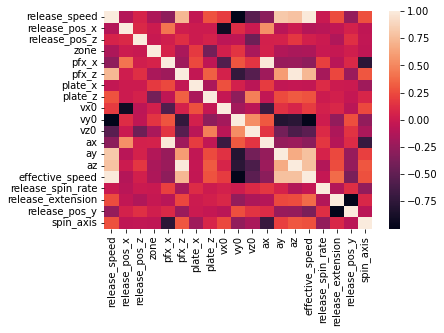

In [25]:
sns.heatmap(data_X.corr())

In [26]:
data_X.corr()

,release_speed,release_pos_x,release_pos_z,zone,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,effective_speed,release_spin_rate,release_extension,release_pos_y,spin_axis
release_speed,1.000000,-0.109629,0.056283,-0.145609,-0.285244,0.731104,-0.040113,0.276713,0.180952,-0.999649,-0.534292,-0.298938,0.816556,0.783399,0.989629,-0.015096,0.255028,-0.255576,0.267916
release_pos_x,-0.109629,1.000000,0.089213,0.002753,0.421356,0.022886,0.001281,0.000755,-0.914876,0.110570,-0.005210,0.541285,-0.085945,0.007730,-0.113356,-0.089303,-0.054308,0.054423,-0.060560
release_pos_z,0.056283,0.089213,1.000000,-0.022430,0.030647,0.122863,0.001717,0.049038,-0.077428,-0.057409,-0.444504,0.042355,0.047933,0.162949,0.038589,-0.004665,-0.127554,0.127769,-0.047309
zone,-0.145609,0.002753,-0.022430,1.000000,0.055056,-0.163198,0.177708,-0.406279,0.038837,0.149787,-0.158518,0.048307,-0.124202,-0.157820,-0.146830,-0.011623,-0.024182,0.024213,-0.056720
pfx_x,-0.285244,0.421356,0.030647,0.055056,1.000000,-0.216292,0.237308,-0.054967,-0.576369,0.284167,0.153499,0.981782,-0.235767,-0.228805,-0.284297,0.200771,-0.091769,0.091877,-0.772491
pfx_z,0.731104,0.022886,0.122863,-0.163198,-0.216292,1.000000,-0.041556,0.333635,0.048788,-0.728475,-0.553813,-0.203222,0.599470,0.985649,0.726808,-0.178527,0.229262,-0.229958,0.294596
plate_x,-0.040113,0.001281,0.001717,0.177708,0.237308,-0.041556,1.000000,-0.155766,0.271222,0.043728,-0.082801,0.180802,-0.051554,-0.037396,-0.040512,0.103347,0.001796,-0.001807,-0.207242
plate_z,0.276713,0.000755,0.049038,-0.406279,-0.054967,0.333635,-0.155766,1.000000,-0.031175,-0.284124,0.468488,-0.051392,0.250018,0.306314,0.276038,0.005677,0.036580,-0.036671,0.077195
vx0,0.180952,-0.914876,-0.077428,0.038837,-0.576369,0.048788,0.271222,-0.031175,1.000000,-0.180076,-0.082439,-0.687228,0.140729,0.068429,0.183842,0.046356,0.081871,-0.082019,0.235681
vy0,-0.999649,0.110570,-0.057409,0.149787,0.284167,-0.728475,0.043728,-0.284124,-0.180076,1.000000,0.527955,0.297840,-0.811969,-0.780525,-0.991250,0.014604,-0.262024,0.262575,-0.266332


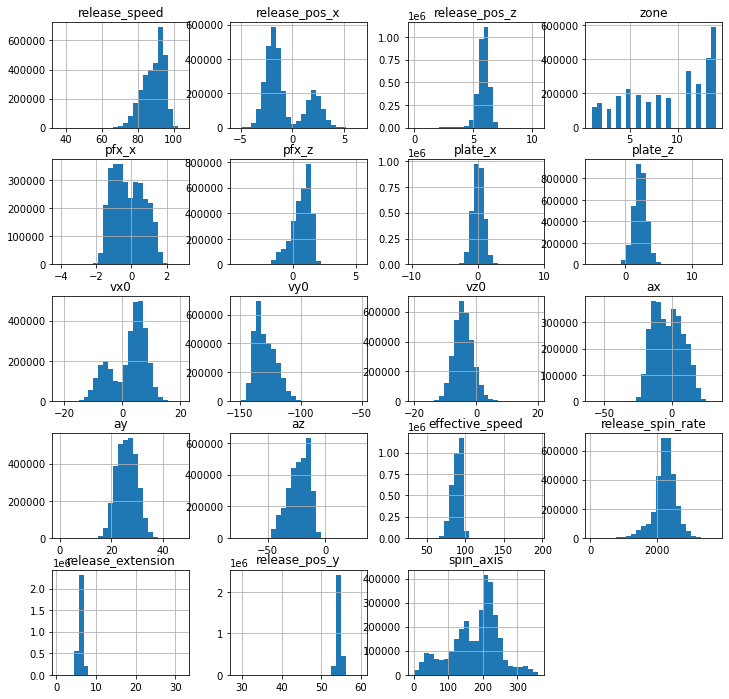

In [27]:
hist = data_X.hist(bins=25,figsize=(12,12))

There are no outliers but there are several highly correlated variables.  I will leave these variables in as I plan to use PCA which should be robust to these highly correlated variables, but initially I will look at a straight k-means classification on the data before doing any dimension reduction techniques to demonstrate how poor the classification would be without them.

## Base K-Means Model

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
standard_scaler = StandardScaler()
scaled = standard_scaler.fit_transform(data_X)

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(max_iter=5000, n_clusters=9, n_init=25,random_state=42).fit(data_X)

In [31]:
init_preds = kmeans.predict(data_X)

In [32]:
unique, counts = np.unique(init_preds, return_counts=True)

In [33]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [34]:
counts

array([460383, 511075,  43452, 688270, 101364, 271444, 670351, 142047,
       201726], dtype=int64)

In [35]:
training_groups = pd.DataFrame(data=init_preds,columns=['Preds'])

In [36]:
training_groups['True']=data_Y

In [37]:
training_groups['Combined']=training_groups['True']+training_groups['Preds'].astype(str)

training_groups['Combined'].value_counts()

FF3    241630
FF6    234239
FF1    179927
FF0    160801
SL3    113719
        ...  
KC4      2432
FS7      1994
FS4      1459
KC2      1011
FS2       654
Name: Combined, Length: 81, dtype: int64

In [38]:
training_groups['Combined'].value_counts().head(20)

FF3    241630
FF6    234239
FF1    179927
FF0    160801
SL3    113719
SL6    109637
FF5     95059
SL1     84830
SL0     75630
CH3     73825
CH6     71870
SI3     70567
FF8     70445
SI6     68574
CU3     56087
CU6     55316
CH1     54271
FT3     52315
SI1     52300
FT6     51433
Name: Combined, dtype: int64

Using just K-Means without reducing dimensions first and attempting to find 9 different clusters (based on the 9 different pitch types we have in our data) we find the clusters are quite poor.  Fastballs (FF) are found in each cluster and there isnt any sort of obvious separation between the different pitch types.

## Using PCA and K-Means

I followed that basic model with one using PCA for dimension reduction in an attempt to find the main factors determining the differnt pitches

In [39]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled)


PCA()

In [40]:
pca.explained_variance_ratio_

array([3.32377830e-01, 1.58541460e-01, 9.97757204e-02, 9.77610760e-02,
       8.55965619e-02, 5.25914551e-02, 4.85162763e-02, 3.76009666e-02,
       3.48418592e-02, 2.71676323e-02, 1.45825978e-02, 9.62362698e-03,
       4.24855381e-04, 3.19761155e-04, 9.79688389e-05, 9.35637448e-05,
       6.58622048e-05, 1.69302743e-05, 3.99627744e-06])

Text(0, 0.5, 'Cumulative Explained Variance')

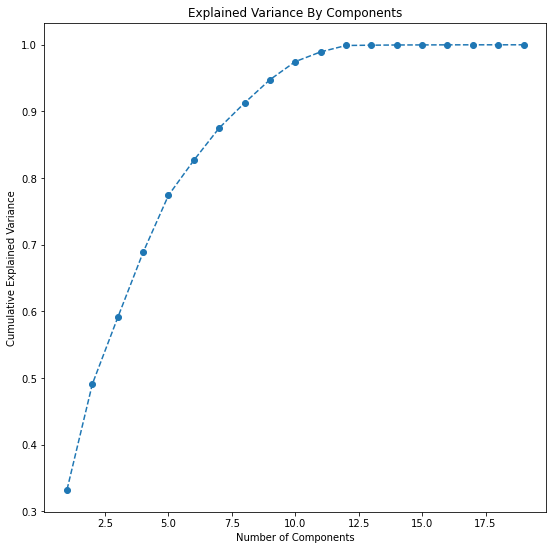

In [41]:
plt.figure(figsize=(9,9))
plt.plot(range(1,20),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance By Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

We can see that the majority of variance is explained by the first 12 principal components.  Lets fit the PCA model to these 12 components

In [42]:
pca = PCA(n_components=12)
pca.fit(scaled)

PCA(n_components=12)

In [43]:
scores_pca = pca.transform(scaled)

In [44]:
scores_pca

array([[ 1.67924608,  0.85513969, -1.61600993, ...,  0.6261165 ,
        -0.49039886,  0.24612753],
       [ 0.95150613,  1.06437977, -0.68992788, ...,  0.15796572,
         0.24292477,  0.28402307],
       [ 2.87194306,  0.95474583,  0.00741951, ...,  0.56680142,
        -0.26911206, -0.14359234],
       ...,
       [ 1.46431474, -0.09370674, -2.32949354, ..., -0.76831705,
         1.32691378,  0.43147533],
       [ 1.56347873, -0.23892894, -2.1863218 , ..., -0.7542902 ,
         1.21239163,  0.18561152],
       [ 1.36043392, -0.07486646, -1.69867583, ...,  0.31868539,
         1.29149532,  0.1497998 ]])

And saving the pca components as a dataframe for later

In [45]:
PCA_components = pd.DataFrame(scores_pca)

Now I will try to find how many clusters we truly have based on the reduced data and the elbow method

In [46]:
inertias = []
for i in range (1,14):
    kmeans_pca = KMeans(n_clusters=i,init='k-means++',random_state=123)
    kmeans_pca.fit(scores_pca)
    inertias.append(kmeans_pca.inertia_)

Text(0, 0.5, 'K-Means with PCA clustering')

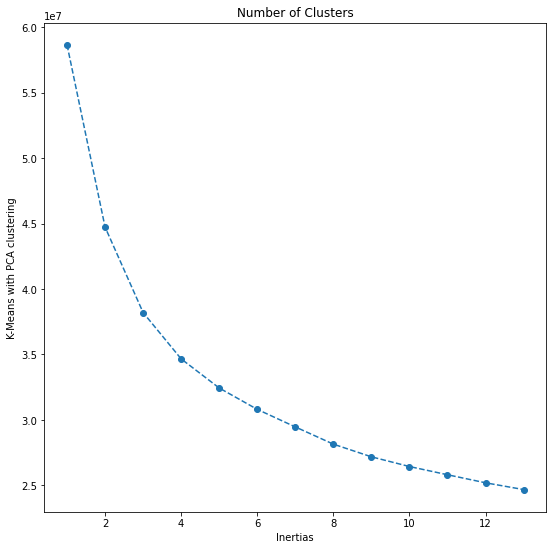

In [48]:
plt.figure(figsize=(9,9))
plt.plot(range(1,14),inertias,marker='o',linestyle='--')
plt.title('Number of Clusters')
plt.xlabel('Inertias')
plt.ylabel('K-Means with PCA clustering')

Using the elbow method, we see there appear to be 3 clusters in this data.  This suggests there are 3 general pitch types that batters should focus on and attempt to identify in the fraction of a second they have before the pitch arrives at home plate.  This is significantly less than the 9 different pitch types the statcast data suggests.

Plotting the clusters based on a scatterplot of the 1st principal component vs the 2nd.  We see there are clearly 3 distinct clusters

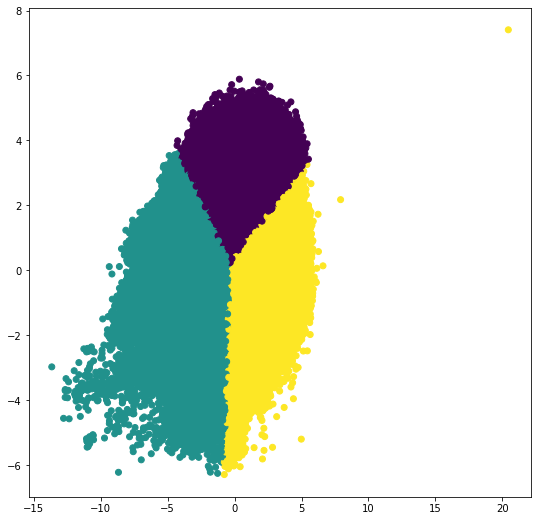

In [49]:
model = KMeans(n_clusters=3,init='k-means++',random_state=123)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.figure(figsize=(9,9))
plt.scatter(PCA_components[0], PCA_components[1], c=labels)

That is great, as we have shown there are 3 types of pitches that hitters should focus on, but what are the main factors influencing these different clusters and pitch types.  In order to answer that, I will look at the loadings of the different principal components.

In [50]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [51]:
loadings.shape

(19, 12)

In [52]:
data_X.columns

Index(['release_speed', 'release_pos_x', 'release_pos_z', 'zone', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
       'effective_speed', 'release_spin_rate', 'release_extension',
       'release_pos_y', 'spin_axis'],
      dtype='object')

In [53]:
results_df = pd.DataFrame(data=loadings,index=data_X.columns,columns=['PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','PC_7','PC_8','PC_9','PC_10','PC_11','PC_12'])

In [54]:
results_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12
release_speed,0.921915,0.208545,-0.065989,-0.056500,-0.158483,-0.151761,-0.041633,-0.048101,-0.003677,-0.169409,0.133723,-0.004955
release_pos_x,-0.226539,0.699928,-0.155522,0.117777,0.476838,-0.193683,0.064499,0.347820,-0.033720,-0.096351,-0.014195,-0.139820
release_pos_z,0.091273,0.201651,-0.258320,-0.414006,0.154909,0.742634,-0.154150,0.153661,0.247813,-0.166347,0.005312,0.027156
zone,-0.169623,-0.071286,0.332491,-0.507761,0.191691,-0.382660,0.032042,-0.043566,0.639055,0.055062,0.015696,-0.002687
pfx_x,-0.516592,0.762009,0.151599,-0.050271,-0.251651,0.021553,0.059498,-0.150357,-0.011733,0.026316,0.024003,0.179546
pfx_z,0.822269,0.289476,-0.140541,-0.023258,0.075524,0.051413,0.226084,-0.055760,0.010225,0.389179,-0.042208,-0.025398
plate_x,-0.091281,0.078245,0.333907,-0.405608,-0.359602,0.015335,0.623807,0.406054,-0.109991,-0.112932,-0.014931,-0.028184
plate_z,0.270975,0.124656,-0.392604,0.643629,-0.328367,0.193694,0.218786,0.088612,0.373897,0.006176,0.033799,-0.006315
vx0,0.329421,-0.763966,0.190116,-0.215316,-0.418128,0.146959,0.143831,-0.070576,-0.007548,0.024695,-0.000335,0.042658
vy0,-0.921323,-0.208994,0.062740,0.047027,0.160184,0.145854,0.044106,0.047815,0.000323,0.171816,-0.143279,0.005291


So, we can see the most important variables are the effective speed, release speed, and velocity in the y direction (y direction is toward home plate, probably indicating a fastball).  These are followed by the variables indicating up/down movement (the z direction) and lastly variables indicating movement in the x (left/right direction).  These x direction variables are much more relevant in the second principal component.  This indicates a batter may only need to be able to recognize only three pitch types (straight at the batter at high velocity, large movement up and down which may indicate a curveball, and large movements to the left and right) in order to be succesful at the plate.  This is interesting and could be used by a hitting coach or player attempting to improve their hitting by looking for key movements in order to recognize a pitch before swinging.